In [50]:
import pandas as pd
import numpy as np

In [51]:
apps = pd.read_csv('Wuzzuf_Applications_Sample.csv')

In [52]:
posts = pd.read_csv('Wuzzuf_Job_Posts_Sample.csv')

In [53]:
apps.head()

,id,user_id,job_id,app_date
0,ba7b8f17,846d013c,516e4ed,2014-01-01 07:27:52
1,30e1ae86,9d5e32c5,516e4ed,2014-01-01 08:20:42
2,d829a6b7,eb26a291,516e4ed,2014-01-01 10:30:37
3,3f985f37,7b5e68a8,516e4ed,2014-01-01 10:55:07
4,27e1695,76fa79b1,516e4ed,2014-01-01 11:00:26


In [54]:
apps.groupby('user_id').job_id.nunique().sort_values(ascending=False)

user_id
4ca790ab    801
bd6f698f    663
52d3e66e    632
bb641108    563
60ecdbc3    562
           ... 
ab39fd95      1
4e14c1e3      1
4e13ac27      1
4e133bf5      1
75edd327      1
Name: job_id, Length: 314460, dtype: int64

In [55]:
apps[apps.user_id=='4ca790ab'][apps[apps.user_id=='4ca790ab'].job_id.duplicated()]

,id,user_id,job_id,app_date
303545,cd72e58c,4ca790ab,aee4ec21,2014-09-29 03:10:59


In [56]:
apps[(apps.user_id=='4ca790ab') & (apps.job_id=='aee4ec21')]

,id,user_id,job_id,app_date
303544,62e3629,4ca790ab,aee4ec21,2014-09-29 03:10:59
303545,cd72e58c,4ca790ab,aee4ec21,2014-09-29 03:10:59


If a user applied to the same job more than once, we should take the latest one only

In [57]:
dups = apps[apps.duplicated(['user_id','job_id'], keep=False)]
apps = apps.drop(dups.index)
apps = apps.append(dups[dups.duplicated(['user_id','job_id'], keep='last')])

In [58]:
apps.head()

,id,user_id,job_id,app_date
0,ba7b8f17,846d013c,516e4ed,2014-01-01 07:27:52
1,30e1ae86,9d5e32c5,516e4ed,2014-01-01 08:20:42
2,d829a6b7,eb26a291,516e4ed,2014-01-01 10:30:37
3,3f985f37,7b5e68a8,516e4ed,2014-01-01 10:55:07
4,27e1695,76fa79b1,516e4ed,2014-01-01 11:00:26


In [59]:
posts.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000,5000,8,Entry Level,0-2,2014-01-01 20:01:18,2213,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000,2500,1,Entry Level,2,2014-01-02 11:01:03,2940,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000,3500,1,Entry Level,1-2,2014-01-02 12:01:23,2042,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000,8000,1,Experienced (Non-Manager),1-3,2014-01-21 13:45:56,5684,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound


In [60]:
posts['salary_maximum'].value_counts()

5000     2587
3000     2410
4000     2063
2500     1733
6000     1494
         ... 
48000       1
15200       1
2150        1
55          1
65000       1
Name: salary_maximum, Length: 214, dtype: int64

In [61]:
posts.apply(lambda row: str(row['salary_minimum'])+'-'+str(row['salary_maximum']),axis=1).value_counts()

2000-3000        1075
3000-5000         997
2000-2500         839
1500-2000         809
2000-4000         678
                 ... 
11900-21900         1
4500-15000          1
1700-2700           1
900-950             1
100000-500000       1
Length: 1020, dtype: int64

In [62]:
((posts.salary_maximum-posts.salary_minimum)/2).value_counts(normalize=True).head(20)*100

500.0     18.402746
1000.0    15.560641
250.0     14.425629
1500.0     7.858124
750.0      6.951945
2500.0     3.853547
150.0      3.812357
2000.0     3.743707
100.0      3.098398
1250.0     2.860412
0.0        2.114416
200.0      1.711670
400.0      1.217391
5000.0     1.006865
1750.0     0.983982
3000.0     0.947368
350.0      0.910755
50.0       0.887872
4000.0     0.768879
300.0      0.700229
dtype: float64

We will use Tableau to do this one.

In [63]:
apps.head()

,id,user_id,job_id,app_date
0,ba7b8f17,846d013c,516e4ed,2014-01-01 07:27:52
1,30e1ae86,9d5e32c5,516e4ed,2014-01-01 08:20:42
2,d829a6b7,eb26a291,516e4ed,2014-01-01 10:30:37
3,3f985f37,7b5e68a8,516e4ed,2014-01-01 10:55:07
4,27e1695,76fa79b1,516e4ed,2014-01-01 11:00:26


In [64]:
merged = posts.merge(apps[['user_id','job_id','app_date']], left_on='id',right_on='job_id')
merged.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,experience_years,post_date,views,job_description,job_requirements,payment_period,currency,user_id,job_id,app_date
0,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,...,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound,846d013c,516e4ed,2014-01-01 07:27:52
1,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,...,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound,9d5e32c5,516e4ed,2014-01-01 08:20:42
2,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,...,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound,eb26a291,516e4ed,2014-01-01 10:30:37
3,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,...,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound,7b5e68a8,516e4ed,2014-01-01 10:55:07
4,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,...,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound,76fa79b1,516e4ed,2014-01-01 11:00:26


In [65]:
merged.shape

(1853655, 23)

In [66]:
apps.shape

(1853655, 4)

In [67]:
merged['app_date'] = pd.to_datetime(merged['app_date'])

In [68]:
merged['post_date'] = pd.to_datetime(merged['post_date'])

In [69]:
merged['app_days'] = merged['app_date'] - merged['post_date']
merged['app_days'].tail()

1853650   45 days 04:38:58
1853651   46 days 20:47:11
1853652   47 days 17:56:39
1853653   52 days 13:37:57
1853654   56 days 04:34:28
Name: app_days, dtype: timedelta64[ns]

In [70]:
merged.app_days = merged.app_days.dt.days

In [71]:
merged.app_days[merged.app_days<0].value_counts()

-7      5036
-1      4668
-2      4361
-3      4253
-6      4250
        ... 
-265       1
-159       1
-264       1
-293       1
-289       1
Name: app_days, Length: 299, dtype: int64

In [72]:
merged.shape

(1853655, 24)

In [73]:
81739 / 1853655 * 100

4.409612360444635

Somehow, 4.4% of the data has jobs, that have been applied to, days before they were posted

In [74]:
merged[merged.app_days<0][['post_date','app_date']].head()

,post_date,app_date
488,2014-01-21 13:45:56,2014-01-02 14:37:47
489,2014-01-21 13:45:56,2014-01-02 15:27:41
490,2014-01-21 13:45:56,2014-01-02 16:10:05
491,2014-01-21 13:45:56,2014-01-02 17:12:49
492,2014-01-21 13:45:56,2014-01-02 17:23:19


In [75]:
merged['job_requirements'].value_counts().index[0]

'<ul>\r\n<li>0-2 Years of Experience.</li>\r\n<li>University Graduate in any discipline.</li>\r\n<li><strong>Excellent command of written and spoken English.</strong></li>\r\n<li>Ability to understand and interpret numeric data.</li>\r\n<li>Good conversational skills to hold the attention of the customer on the telephone.</li>\r\n<li>Good Computer Knowledge</li>\r\n<li>Ability to write business letters and reports.</li>\r\n<li>Flexibility to work shifts 24/7.</li>\r\n</ul>'

In [76]:
reqs = merged['job_requirements'].value_counts().index
for i in range(10):
    print(reqs[i])
    print('\n')

<ul>
<li>0-2 Years of Experience.</li>
<li>University Graduate in any discipline.</li>
<li><strong>Excellent command of written and spoken English.</strong></li>
<li>Ability to understand and interpret numeric data.</li>
<li>Good conversational skills to hold the attention of the customer on the telephone.</li>
<li>Good Computer Knowledge</li>
<li>Ability to write business letters and reports.</li>
<li>Flexibility to work shifts 24/7.</li>
</ul>


<ul>
<li>English: Very Good</li>
<li>Computer Skills: Very Good</li>
</ul>


<ul>
<li>Very good command of English language</li>
<li>Excellent customer service orientated persons with accepted technical knowledge</li>
<li>Able to handle ADSL technical, billing &amp; smart phones inquires.</li>
<li>High ability to work under pressures &amp; meet the required overtime hours required to achieve SL</li>
<li>Excellent communication &amp; negation skills</li>
<li>Computer/Communication graduate and/or Cisco/Microsoft certified in a relevant field.<

In [77]:
desc = merged['job_description'].value_counts().index
for i in range(10):
    print(desc[i])
    print('\n')

<ul>
<li>Search tenders and apply for them</li>
<li>Contact with foreign companies to get from them quotations</li>
<li>Study the received quotations technically.</li>
<li>Assure that the received quotation completely match the client's inquiry</li>
<li>Prepare financial offer</li>
<li>follow up with the client, the foreign company, shipment agency and custom clearance office to assure the delivery time</li>
<li>Revise the order confirmation and compare it with the order and the offer.</li>
<li>Coordinate with the customer for layout drawings approvals.</li>
<li>Making technical discussions with clients.</li>
<li>Follow up the requested sample list if any.</li>
<li>Coordinate with after sales office to complete the start up.</li>
</ul>


<ul>
<li>To continuously provide high quality processing service to achieve maximum customer satisfaction within the specified Service Level Agreements.</li>
<li>Responsible for relationship building and resolving customer queries and issues in a profe

In [78]:
merged.iloc[0]

id                                                            516e4ed
city                                                             Ciro
job_title                                     Sales & Marketing Agent
job_category1                       Sales/Retail/Business Development
job_category2                                               Marketing
job_category3                                                  Select
job_industry1                             Telecommunications Services
job_industry2                                                  Select
job_industry3                                                  Select
salary_minimum                                                   2000
salary_maximum                                                   3500
num_vacancies                                                       8
career_level                                              Entry Level
experience_years                                                  0-1
post_date           

In [79]:
exp = merged.experience_years.value_counts(normalize=True)

<AxesSubplot:>

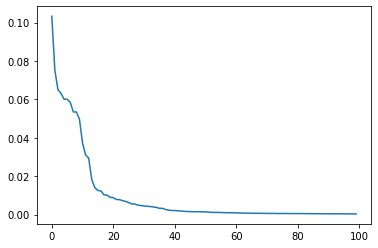

In [80]:
exp.reset_index(drop=True).head(100).plot()

In [81]:
exp.head(40).sum()

0.9262904909489631

In [82]:
exp.head(40).index.tolist()

['0-2',
 '2+',
 '1-3',
 '3+',
 '3-5',
 '1+',
 '0-3',
 '0-1',
 '1-2',
 '5+',
 '2-3',
 '2-4',
 '2-5',
 '4+',
 '5-7',
 '10+',
 '1-5',
 '1-4',
 '0-5',
 '0-4',
 '7+',
 '3-6',
 '<1',
 '4-6',
 '3-4',
 '5-10',
 '6+',
 '5-8',
 '10-15',
 '15+',
 '4-5',
 '3-7',
 '7-10',
 '8+',
 '0+',
 '8-10',
 '4-7',
 '2-6',
 '2-7',
 '0-2 ']

In [83]:
merged[merged.career_level=='Student'].experience_years.value_counts(normalize=True)

<1        0.450372
0-1       0.282046
0         0.070587
1<        0.059891
0-2       0.046466
1+        0.036420
0-3       0.031180
0+        0.014594
0 to 1    0.005500
0 - 1     0.001516
0-5       0.001429
Name: experience_years, dtype: float64

In [84]:
ranges = exp.head(40).index.tolist()

In [85]:
for rng in ranges:
    print(rng)
    print(merged[merged.experience_years==rng].career_level.value_counts(normalize=True))
    print('\n')

0-2
Entry Level                  0.935380
Experienced (Non-Manager)    0.059018
Student                      0.005602
Name: career_level, dtype: float64


2+
Experienced (Non-Manager)           0.950649
Entry Level                         0.043452
Manager                             0.005425
Senior Management (e.g. VP, CEO)    0.000474
Name: career_level, dtype: float64


1-3
Experienced (Non-Manager)    0.625827
Entry Level                  0.373808
Manager                      0.000365
Name: career_level, dtype: float64


3+
Experienced (Non-Manager)    0.909134
Manager                      0.084353
Entry Level                  0.006512
Name: career_level, dtype: float64


3-5
Experienced (Non-Manager)    0.941372
Manager                      0.052983
Entry Level                  0.005645
Name: career_level, dtype: float64


1+
Experienced (Non-Manager)           0.501104
Entry Level                         0.486501
Student                             0.007548
Manager                

In [86]:
new_ranges = {
    '0-2':'0',
    '2+': '2-5',
    '1-3':'1-3' ,
    '3+':'3-5',
    '3-5': '3-5',
    '1+': '1-5',
    '0-3': '0-2',
    '0-1': '0-2',
    '1-2': '1-3',
    '5+': '5+',
    '2-3': '2-5',
    '2-4': '2-5',
    '2-5': '2-5',
    '4+': '2-5',
    '5-7': '5+',
    '10+': '10+',
    '1-5': '1-5',
    '1-4': '1-5',
    '0-5': '0-5',
    '0-4': '0-5',
    '7+':'5+',
    '3-6':'3-5',
    '<1': '0',
    '4-6': '3-5',
    '3-4': '3-5',
    '5-10': '5+',
    '6+': '5+',
    '5-8': '5+',
    '10-15': '10+',
    '15+': '15+',
    '4-5':'3-5',
    '3-7':'3-5',
    '7-10':'5+',
    '8+':'5+',
    '0+':'0',
    '8-10':'5+',
    '4-7':'3-5',
    '2-6':'3-5',
    '2-7':'3-5',
    '0-2 ':'0',
}

In [87]:
rng

'0-2 '

In [88]:
merged.loc[merged.experience_years.isin(ranges), 'experience_years'] = \
    merged.loc[merged.experience_years.isin(ranges), 'experience_years'].map(new_ranges,na_action='ignore')

In [89]:
merged.experience_years.value_counts(normalize=True).head(20)

2-5      0.191098
3-5      0.162275
0        0.119003
1-3      0.118522
0-2      0.111998
5+       0.101371
1-5      0.082693
0-5      0.019101
10+      0.017497
15+      0.004710
6-8      0.002119
6-9      0.001892
1-2      0.001691
5-6      0.001616
3 - 5    0.001542
1        0.001512
3-5      0.001500
3-8      0.001483
6-10     0.001473
4-8      0.001409
Name: experience_years, dtype: float64

In [90]:
merged.job_title.value_counts(normalize=True).head(20)

Graphic Designer                   0.014768
Customer Service Representative    0.011619
Call Center Agent                  0.010857
Social Media Specialist            0.008542
Customer Service Agent             0.008343
Mechanical Engineer                0.007251
Sales Engineer                     0.007164
Marketing Manager                  0.006491
Site Engineer                      0.006199
Marketing Specialist               0.006134
Electrical Engineer                0.006033
IT Specialist                      0.005936
Web Developer                      0.005138
Marketing Executive                0.004601
Maintenance Engineer               0.004581
Software Developer                 0.004569
Project Manager                    0.004263
PHP Developer                      0.004193
Production Engineer                0.003960
Interior Designer                  0.003734
Name: job_title, dtype: float64

too many to manually work through

In [91]:
merged.iloc[0]

id                                                            516e4ed
city                                                             Ciro
job_title                                     Sales & Marketing Agent
job_category1                       Sales/Retail/Business Development
job_category2                                               Marketing
job_category3                                                  Select
job_industry1                             Telecommunications Services
job_industry2                                                  Select
job_industry3                                                  Select
salary_minimum                                                   2000
salary_maximum                                                   3500
num_vacancies                                                       8
career_level                                              Entry Level
experience_years                                                  0-2
post_date           

In [92]:
merged.nunique()

id                    19208
city                    376
job_title              9291
job_category1            30
job_category2            31
job_category3            31
job_industry1           113
job_industry2           110
job_industry3           105
salary_minimum          149
salary_maximum          189
num_vacancies            15
career_level              5
experience_years        331
post_date             18797
views                  3699
job_description       15608
job_requirements      14277
payment_period            5
currency                 14
user_id              314460
job_id                19208
app_date            1824520
app_days                675
dtype: int64

In [93]:
posts.shape

(21850, 20)

In [97]:
cols_todrop = ['id','job_description','job_requirements','user_id']#,'job_id']
output = merged.drop(cols_todrop, axis=1)
output.head()

,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,payment_period,currency,job_id,app_date,app_days
0,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-2,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound,516e4ed,2014-01-01 07:27:52,0
1,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-2,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound,516e4ed,2014-01-01 08:20:42,0
2,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-2,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound,516e4ed,2014-01-01 10:30:37,0
3,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-2,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound,516e4ed,2014-01-01 10:55:07,0
4,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-2,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound,516e4ed,2014-01-01 11:00:26,0


In [98]:
output.to_csv('Wuzzuf_clean.csv', index=False)

In [99]:
output.shape

(1853655, 20)

In [100]:
output.job_id.nunique()

19208